# Data Analysis and Visualization Assignment

This assignment involves performing data analysis and visualization on two datasets using Python programming language. The datasets used are:
- **`Airbnb dataset`**
- **`HR Dataset`.**

## _Creating Visualization for `AirBNB dataset.`_

In [1]:
## Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

C:\Users\guru\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Read the datasets
airbnb = pd.read_csv('Airbnb Dataset 19.csv')

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
## Print the number of Rows and Columns in the Dataset.
print('Number of Rows and Columns in the Dataset: ', airbnb.shape)

Number of Rows and Columns in the Dataset:  (249, 16)


### Diagonising Data Cleaning

In [5]:
## Information about the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [6]:
## In the data information there are values are missing in some columns 
## Break down the number of missing values per column in the DataFrame
airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
## ID is a unique value in the dataset from where we can identify the number of duplicate data present in the dataset
## Find duplicates values in the 'id' column
duplicates = airbnb.duplicated(subset= 'id', keep= False)
airbnb[duplicates].sort_values('id')
## There are no duplicate value in the id column.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


**The `drop()` function is a method of pandas dataframes in Python that is used to remove rows or columns from the dataframe. When called on a dataframe, the `drop()` function returns a new dataframe that has had the specified rows or columns removed.**

In [8]:
## Drop columns which are not relevent
airbnb.drop(['id','host_id','last_review'], axis= 1, inplace= True)

**The `describe()` function is a method of pandas dataframes in Python that is used to generate descriptive statistics of the dataframe. When called on a dataframe, the `describe()` function returns a summary of the central tendency, dispersion and shape of the distribution of a dataset.**

In [9]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


### Dealing with missing data

**The `msno.bar` function is part of the missingno library in Python, and it is used to create a bar chart or matrix to visualize the missing values in a dataset. The bar chart shows the number of non-missing values for each column in the dataset, while the matrix chart shows the locations of missing values in the dataset.**

<AxesSubplot:>

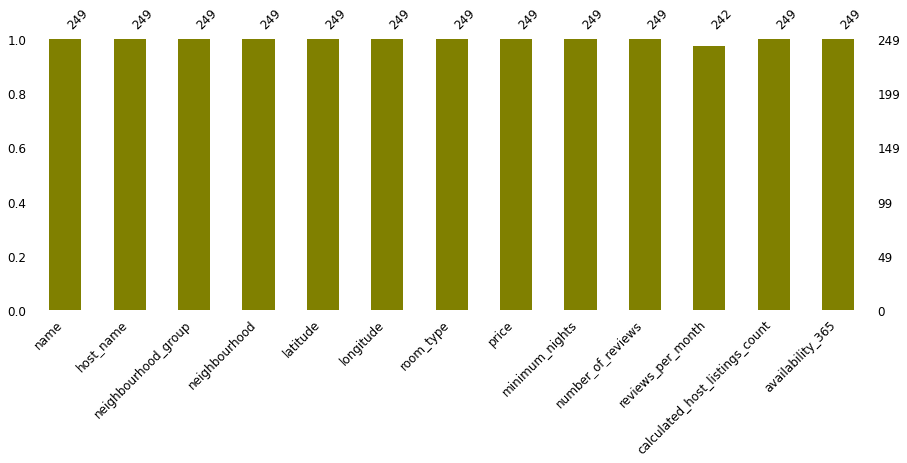

In [10]:
## barplot to identify missing values
msno.bar(airbnb, figsize=(15,5), fontsize=12, color='Olive')

**The `.describe()` function is used to generate descriptive statistics of the DataFrame. When used with the `.isna()` function, it generates descriptive statistics only for the columns with missing values, which can help to better understand the distribution and nature of missing values in the dataset.**

In [11]:
## Understand data with missing values in reviews_per_month.
airbnb[airbnb['reviews_per_month'].isna()].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.000000,7.000000,7.000000,7.000000,7.0,0.0,7.000000,7.000000
mean,40.767837,-73.947346,133.571429,17.000000,0.0,NaN,1.285714,244.142857
std,0.078597,0.011826,58.787349,21.400935,0.0,NaN,0.487950,172.075980
min,40.637020,-73.963270,35.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,40.731045,-73.954010,105.000000,3.500000,0.0,NaN,1.000000,124.500000
50%,40.796850,-73.948720,150.000000,7.000000,0.0,NaN,1.000000,365.000000
75%,40.805680,-73.942510,170.000000,22.000000,0.0,NaN,1.500000,365.000000
max,40.867540,-73.926390,200.000000,60.000000,0.0,NaN,2.000000,365.000000


#### Looking at the missing data in the DataFrame, we can see that `number_of_reviews` across all missing rows is zero(0). We can infer that these listings have never been visited , hence could be inferred they're inactive/have never been visited.

In [12]:
## Replace all null values with 0 (zero reviews) in column reviews_per_month.
airbnb = airbnb.fillna({'reviews_per_month': 0})

**The `fillna()` function in Python is used to fill missing or null values in a DataFrame or Series with a specified value or method. It takes one or more arguments to specify how the missing values should be filled in.**

In [13]:
## Check again for null values in columns
airbnb.isna().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**The `unique()` function in Python is used to return an array of unique elements from an input array or data frame column. It can be applied to a numpy array or pandas series and returns the unique values of that array or series.**

In [14]:
## Number of unique values in 'name' column
airbnb['name'].value_counts().unique().sum() ## This indicates that in the column there are all unique values

1

**The `value_counts()` function in Python is used to return a pandas series containing counts of unique values in a given data frame column.**

In [15]:
## Values of different neighbourhood_group we have.
airbnb['neighbourhood_group'].value_counts()

Manhattan        124
Brooklyn         111
Queens            11
Bronx              2
Staten Island      1
Name: neighbourhood_group, dtype: int64

**The `.index` function is a built-in function in Python that can be used on various data structures like lists, tuples, strings, and data frames.**

In [16]:
airbnb['neighbourhood_group'].value_counts().index

Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')

### Visualizing the Data 

#### Pie chart visualization of the 'neighbourhood_group'
- **The pie chart visualization of the `neighbourhood_group` column provides an overview of the distribution of listings among different neighbourhood groups in the dataset.**

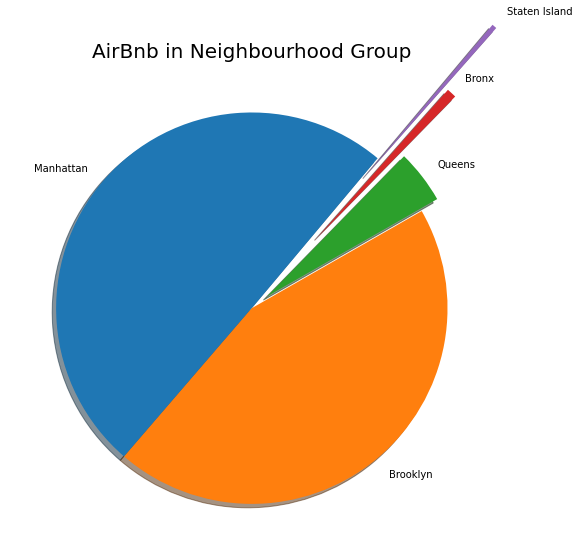

In [17]:
## Pie-chart of different neighbourhood groups.
labels_ngroup = airbnb['neighbourhood_group'].value_counts().index
sizes_ngroup = airbnb['neighbourhood_group'].value_counts()
explode = [0.1, 0.1, 0.1, 0.5, 0.9]

plt.figure(figsize = (9, 9))
plt.pie(sizes_ngroup, labels = labels_ngroup,
        startangle= 50, explode = ([0, 0, 0.1, 0.5, 0.9]), shadow = True)
plt.title('AirBnb in Neighbourhood Group', fontsize= 20)
plt.show()

#### Bar chart visualization of the 'neighbourhood_group'
- **A barplot of the number of neighbourhood groups present in the `neighbourhood_group` column provides a clear visualization of the distribution of neighbourhood groups in the dataset. It is a useful way to understand the relative frequency of each neighbourhood group and to identify any imbalances in the data.**

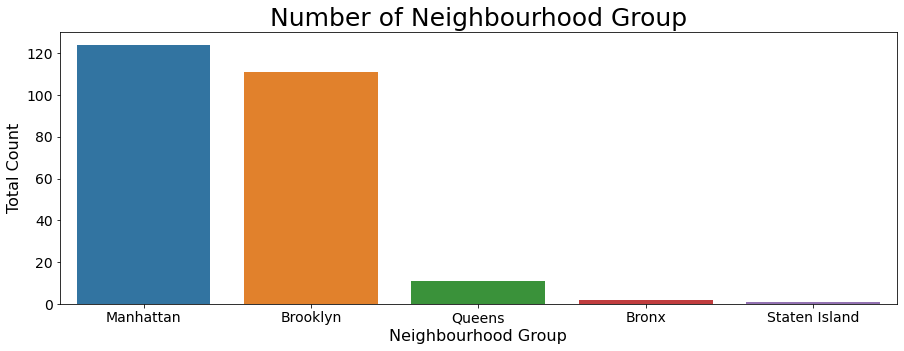

In [18]:
## Barplot of different neighbourhood_group
plt.figure(figsize = (15, 5))
sns.barplot(x=labels_ngroup, y=sizes_ngroup, data=airbnb)

# Set the axis labels and title
plt.xlabel('Neighbourhood Group', fontsize= 16)
plt.ylabel('Total Count', fontsize= 16)
plt.title('Number of Neighbourhood Group', fontsize= 25)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

#### Bar chart visualization of the top 10 Neighborhoods present in  the dataset.
- **A bar plot is created to visualize the top 10 total number of neighborhoods present in the `neighbourhood` column. This plot can help in identifying the neighborhoods with the highest number of listings, which could be useful in making decisions related to pricing, marketing, and other business strategies.**

In [19]:
## Values of different top 10 neighbourhood.
airbnb['neighbourhood'].value_counts().head(10)

Williamsburg          26
Harlem                22
East Village          20
Bedford-Stuyvesant    17
Hell's Kitchen        12
Clinton Hill           9
Upper West Side        9
Fort Greene            8
West Village           8
Lower East Side        8
Name: neighbourhood, dtype: int64

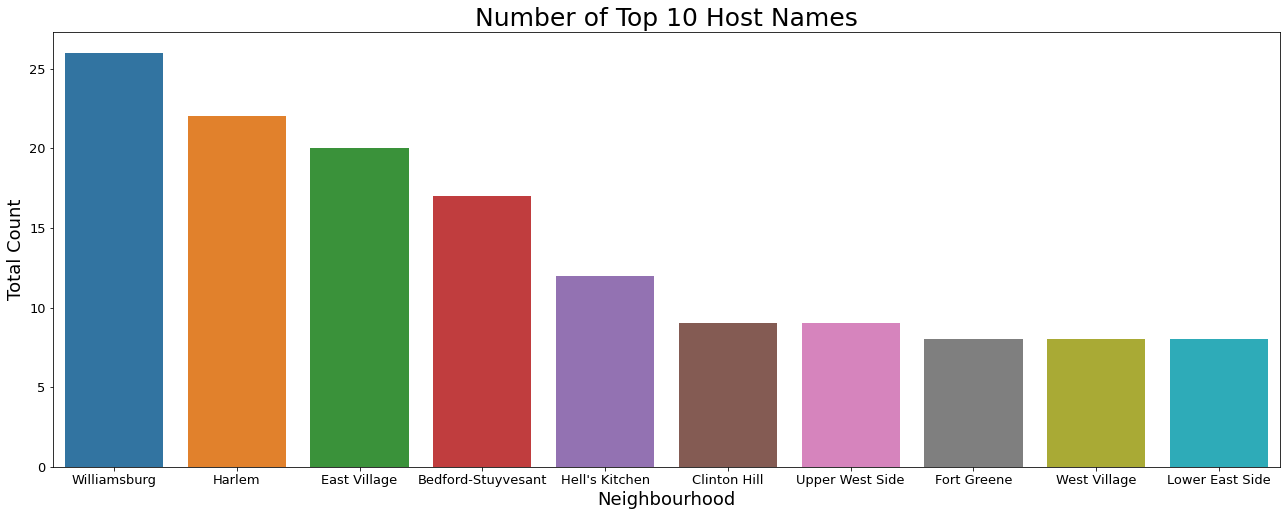

In [20]:
## Barplot of different neighbourhood
labels_nh = airbnb['neighbourhood'].value_counts().head(10).index
sizes_nh = airbnb['neighbourhood'].value_counts().head(10)

plt.figure(figsize = (22, 8))
sns.barplot(x=labels_nh, y=sizes_nh, data=airbnb)

# Set the axis labels and title
plt.xlabel('Neighbourhood', fontsize= 18)
plt.ylabel('Total Count', fontsize= 18)
plt.title('Number of Top 10 Host Names', fontsize= 25)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.show()

#### Visualizing the top 10 host names Using Countplot
- **Visualizing the top 10 host names present in the `host_name` column using a countplot helps in understanding the distribution of hosts in the dataset. It provides insights into the popularity of the top hosts and their frequency of appearance in the dataset.**

In [21]:
## Values of different top 10 host_name.
airbnb['host_name'].value_counts().head(10)

Mark               6
Lulú               3
Lisel              3
Laurine            3
Wayne              3
Jessica            3
Sara               3
Ssameer Or Trip    3
Bruce              3
Laurie             3
Name: host_name, dtype: int64

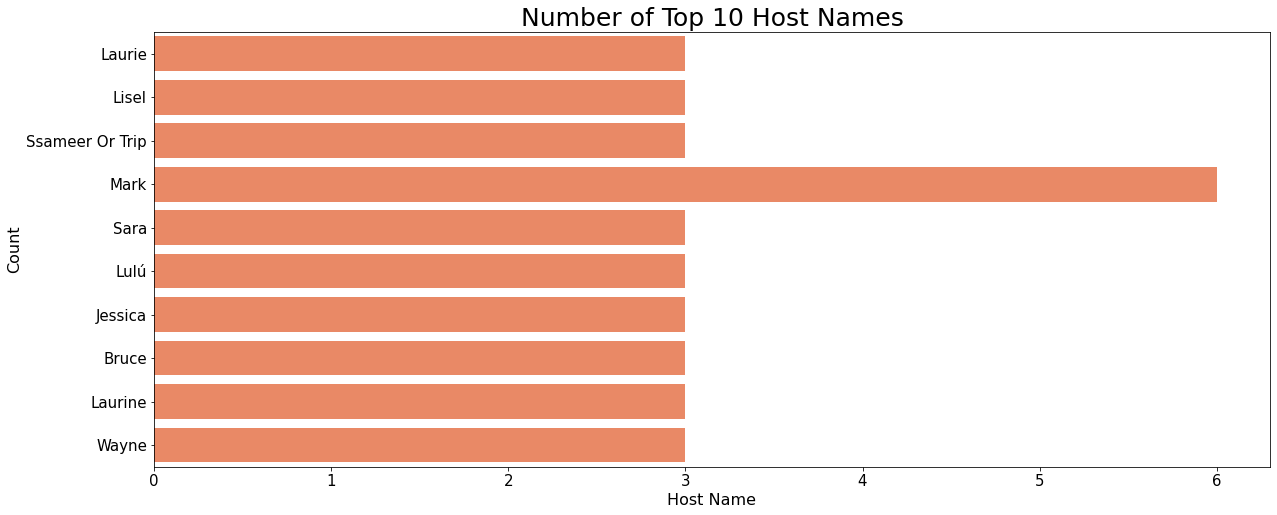

In [22]:
host_counts = airbnb['host_name'].value_counts()
top_hosts = host_counts.head(10)

# Create the countplot using only the top 5 hosts
plt.figure(figsize = (20, 8))
sns.countplot(y='host_name', data= airbnb[airbnb['host_name'].isin(top_hosts.index)], color= 'Coral')

# Set the axis labels and title
plt.xlabel('Host Name', fontsize= 16)
plt.ylabel('Count', fontsize= 16)
plt.title('Number of Top 10 Host Names', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

#### Pie chart visualization of the Room Types
- **Visualizing the number of room types present in the `room_type` column using a pie chart gives a clear and concise representation of the distribution of different room types. The pie chart provides an easy-to-understand visual representation of the proportion of each room type present in the dataset.**

In [23]:
## Values of different room_types we have.
airbnb['room_type'].value_counts()

Entire home/apt    134
Private room       113
Shared room          2
Name: room_type, dtype: int64

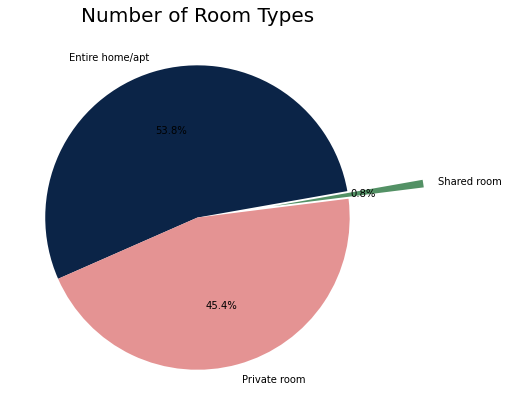

In [24]:
## Lets visualize the chart for room_types
labels_room = airbnb['room_type'].value_counts().index
sizes_room = airbnb['room_type'].value_counts()
explode = [0, 0, 0.5]
colors = ['#0B2447','#E49393','#539165']

plt.figure(figsize = (7, 7))
plt.pie(sizes_room, labels = labels_room,colors= colors, 
        explode= explode, autopct= '%1.1f%%', startangle= 10, shadow = False)
plt.title('Number of Room Types', fontsize= 20)
plt.show()

#### Visualize relationship between Price and RoomTypes using Boxplot.
- **The boxplot is an effective way to visualize the relationship between price and room types. Each box represents the distribution of prices for a particular room type, with the height of the box indicating the interquartile range (IQR) and the whiskers extending to the most extreme data points within 1.5 times the IQR. Outliers are plotted as individual points beyond the whiskers.**

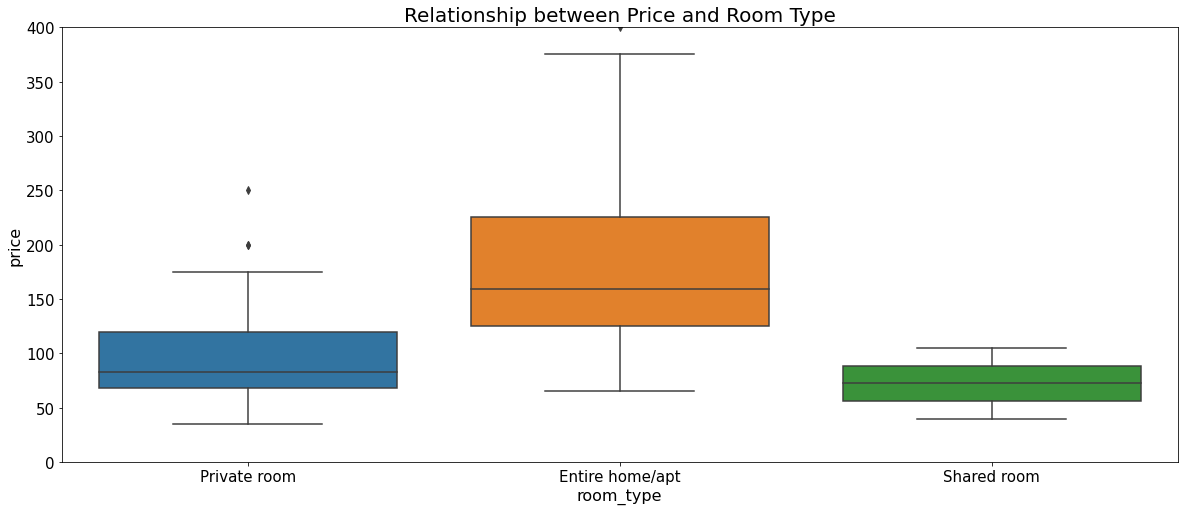

In [25]:
## Visualize relationship between price and room_type.

plt.figure(figsize=(20,8))
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0, 400)

# Set the axis labels and title
plt.xlabel('room_type', fontsize= 16)
plt.ylabel('price', fontsize= 16)
plt.title('Relationship between Price and Room Type', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

#### Creating Barplot to show average price for each room types
- **The barplot visualization provides an insightful representation of the relationship between the average price and each room type present in the `room_type` column. It helps in understanding the difference in average price for each room type and identifying which room type is more expensive.**

In [26]:
## Get mean price per room types.
room_type_ap = airbnb.groupby('room_type')['price'].mean()
room_type_ap

room_type
Entire home/apt    188.574627
Private room        92.345133
Shared room         72.500000
Name: price, dtype: float64

C:\Users\guru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


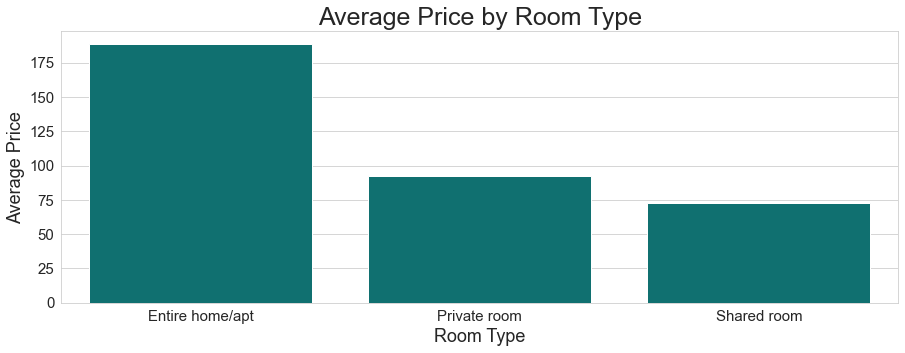

In [27]:
## Creating Barplot to show average price for each room types

plt.figure(figsize = (15, 5))
sns.set_style('whitegrid')
sns.barplot(room_type_ap.index, room_type_ap.values, color= 'Teal')

# Set the axis labels and title
plt.xlabel('Room Type', fontsize= 18)
plt.ylabel('Average Price', fontsize= 18)
plt.title('Average Price by Room Type', fontsize= 25)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

#### Relationship between Price and top 10 Host Name using Barplot
- **The barplot shows the relationship between price and the top 10 host names in the dataset. Each bar represents the total sum of price for a particular host name. This visualization helps to identify which hosts are generating the highest revenue.**

C:\Users\guru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


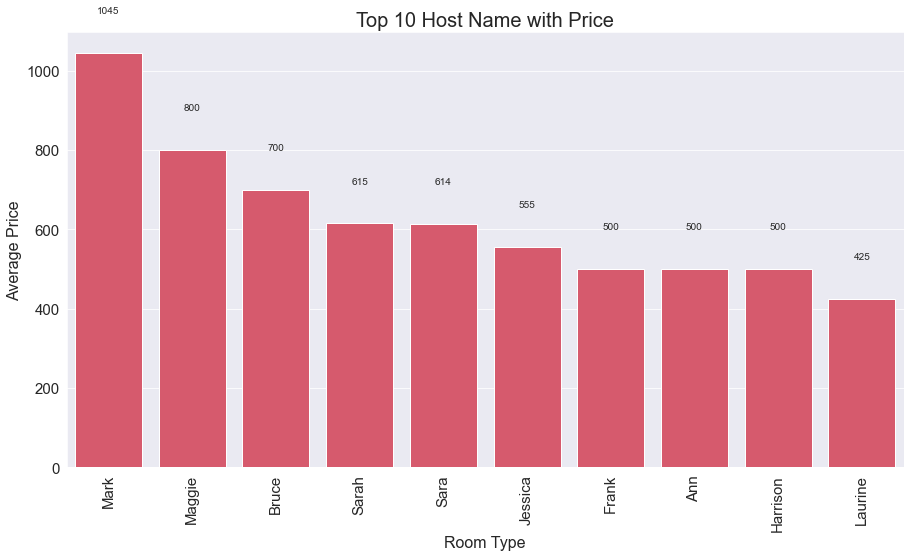

In [28]:
## Let’s check that relationship between price and top 10 host_name with a barplot
host_price = airbnb.groupby('host_name')['price'].sum()
top_10_hosts = host_price.sort_values(ascending=False).head(10)

plt.figure(figsize = (15, 8))
sns.set_style('darkgrid')
sns.barplot(top_10_hosts.index, top_10_hosts.values, color= '#EB455F')

# Set the axis labels and title
plt.xlabel('Room Type', fontsize= 16)
plt.ylabel('Average Price', fontsize= 16)
plt.title('Top 10 Host Name with Price', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xticks(rotation=90)

# Set the sum of price label on each host name in plot
for i, value in enumerate(top_10_hosts.values):
    plt.text(i, value+100, str(value), ha='center')
    
# Show the plot
plt.show()

#### Relationship between Price and Neighbourhood using Boxplot
- **The boxplot provides a clear visual representation of the relationship between price and each neighbourhood in the dataset. It shows the distribution of prices for each neighbourhood, including the median, quartiles, and outliers. This helps to identify any significant differences in prices across different neighbourhoods and also to spot any potential outliers in the data.**

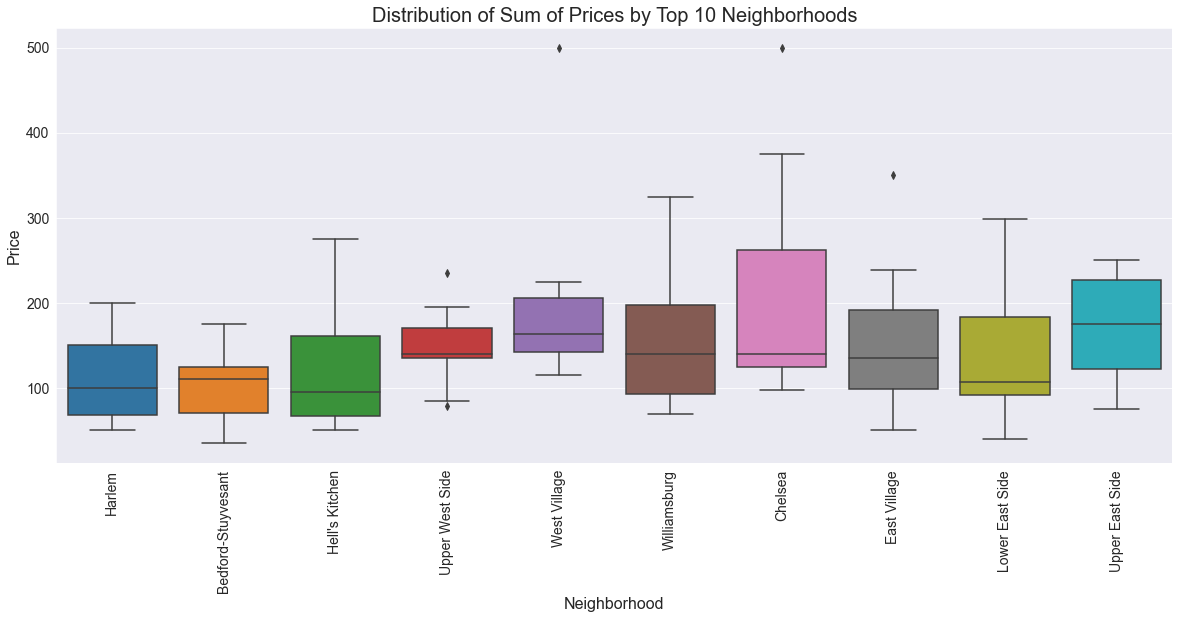

In [29]:
## Let’s check that relationship between price and neighbourhood with a boxplot.

# Group the data by neighborhood and calculate the mean price for each group
neighbour_mean = airbnb.groupby('neighbourhood')['price'].sum()
top_10_neighbourhoods = neighbour_mean.sort_values(ascending=False).head(10)

# Filter the data to only include the top 10 neighborhoods
airbnb_top10 = airbnb.loc[airbnb['neighbourhood'].isin(top_10_neighbourhoods.index)]

plt.figure(figsize=(20, 8))
sns.boxplot(x='neighbourhood', y='price', data=airbnb_top10)

# Add labels and title to the plot
plt.xlabel('Neighborhood', fontsize= 16)
plt.ylabel('Price', fontsize= 16)
plt.title('Distribution of Sum of Prices by Top 10 Neighborhoods', fontsize= 20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xticks(rotation=90)
plt.show()

#### Relationship between Price and Neighbourhood Group using Treemap
- **The Treemap visualization provides a clear overview of the relative size and distribution of the sum of prices among different Neighborhood Groups. The size of each rectangle is proportional to the total sum of prices, and the color can be used to distinguish between different groups.**

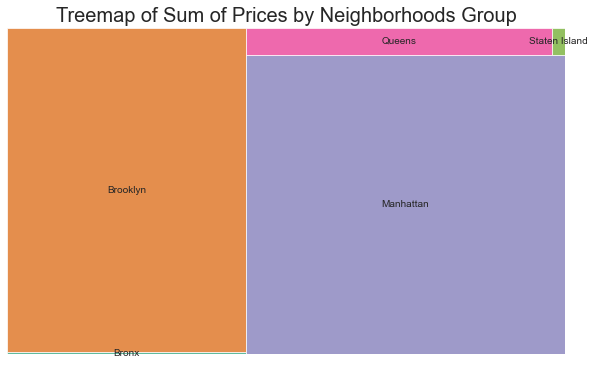

In [30]:
## Let’s check that relationship between price and Neighbourhood Group with a Treemap

#Importing required library for the map
import squarify

# Group the data by neighborhood group and calculate the sum of prices for each group
grouped = airbnb.groupby('neighbourhood_group')['price'].sum()

plt.figure(figsize=(10, 6))
colors = plt.cm.Dark2(range(10))
squarify.plot(sizes=grouped.values, label=grouped.index, alpha=0.7, color=colors)
plt.axis('off')
plt.title('Treemap of Sum of Prices by Neighborhoods Group', fontsize= 20)
plt.show()

#### Scatterplot of latitude and longitude in relation with price
- **The scatterplot provides a clear visualization of the relationship between `latitude`, `longitude`, and `price`. The scatterplot shows the distribution of price in relation to the coordinates on the map. The plot allows for easy identification of any patterns or clusters that may exist in the data.**

C:\Users\guru\AppData\Local\Temp\ipykernel_17284\1440467258.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


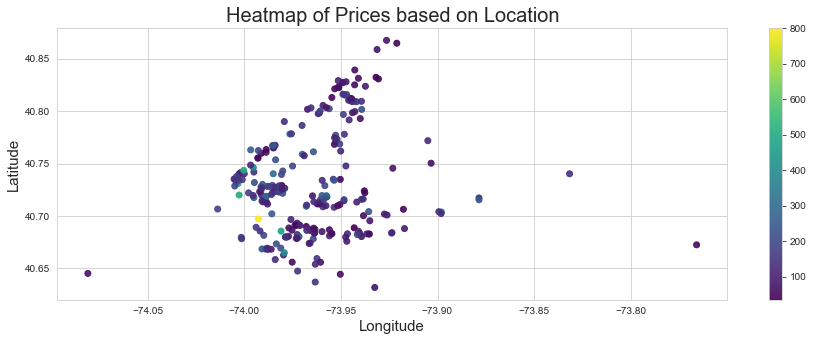

In [31]:
# Create a scatter plot of latitude and longitude with the color map based on the price column

plt.figure(figsize=(15, 5))
sns.set_style('whitegrid')
plt.scatter(airbnb['longitude'], airbnb['latitude'], c=airbnb['price'], cmap='viridis', alpha=0.9)

# Set the axis labels and title
plt.xlabel('Longitude', fontsize= 15)
plt.ylabel('Latitude', fontsize= 15)
plt.title('Heatmap of Prices based on Location', fontsize= 20)

# Adding a color bar
plt.colorbar()
plt.show()

## _Now Creating Visualization for `HR-Dataset`._

In [32]:
hrdata = pd.read_csv('HRDataset_v14.csv')

In [33]:
hrdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [34]:
## Print the number of Rows and Columns in the Dataset.
print('Number of Rows and Columns in the HR-Dataset: ', hrdata.shape)

Number of Rows and Columns in the HR-Dataset:  (311, 36)


### Diagonising Data Cleaning

In [35]:
## Information about the dataset
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [36]:
## EmpID is a unique value in the dataset from where we can identify the number of duplicate data present in the dataset
## Find duplicates values in the 'EmpID' column
duplicates = hrdata.duplicated(subset= 'EmpID', keep= False)
hrdata[duplicates].sort_values('EmpID')
## There are no duplicate value in the id column.

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


#### Drop the columns which are not required

In [37]:
## Drop the 'Zip','DateofTermination','TermReason','LastPerformanceReview_Date'columns
hrdata.drop(['Zip','DateofTermination','TermReason','LastPerformanceReview_Date'], axis= 1, inplace= True)

In [38]:
## Checking column headers
hrdata.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences'],
      dtype='object')

#### Dealing with missing values in ManagerID column

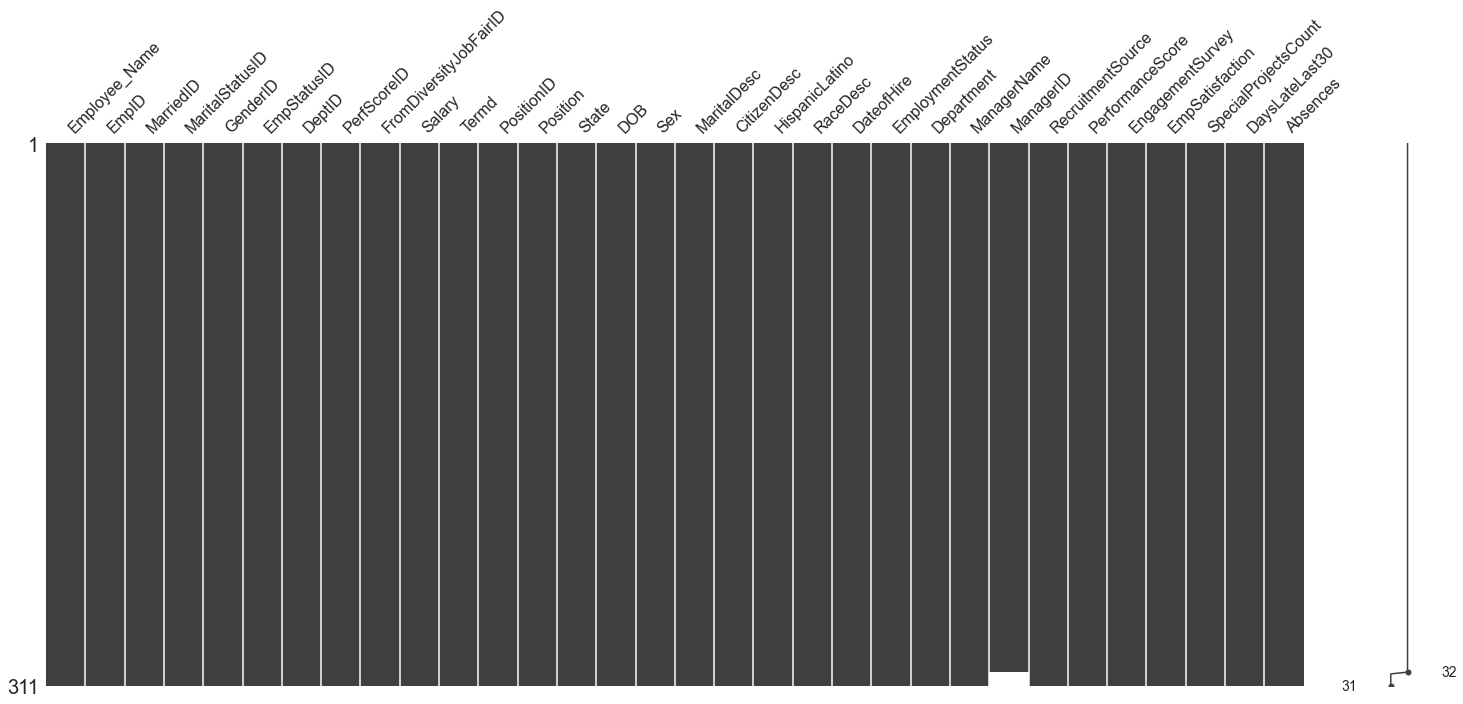

In [39]:
## Visualize the missingness on sorted values 
msno.matrix(hrdata.sort_values(by= 'ManagerID'))
plt.show()

In [40]:
hrdata.sort_values(by= 'ManagerID')

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
132,"Howard, Estelle",10182,1,1,0,1,1,3,0,49920,...,Admin Offices,Brandon R. LeBlanc,1.0,Indeed,Fully Meets,3.24,3,4,0,6
160,"LaRotonda, William",10038,0,2,1,1,1,3,0,64520,...,Admin Offices,Brandon R. LeBlanc,1.0,Website,Fully Meets,5.00,4,4,0,3
268,"Steans, Tyrone",10147,0,0,1,1,1,3,0,63003,...,Admin Offices,Brandon R. LeBlanc,1.0,Indeed,Fully Meets,3.90,5,5,0,9
255,"Singh, Nan",10039,0,0,0,1,1,3,0,51920,...,Admin Offices,Brandon R. LeBlanc,1.0,Website,Fully Meets,5.00,3,5,0,2
29,"Brown, Mia",10238,1,1,0,1,1,3,1,63000,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,4.50,2,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Production,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,...,Production,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,...,Production,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,0,16


##### As visualizing the data null values are there in column `ManagerID`with respect to `ManagerName`. Lets try to fill the null values.

In [41]:
## Fill the missing values in ManagerID column
hrdata["ManagerID"].fillna(hrdata.groupby("ManagerName")["ManagerID"].transform("first"), inplace=True)

In [42]:
## Checking for nmull values in the column
hrdata["ManagerID"].isnull().sum()

0

### Visualizing the Data

### distplot to represent the distribution of salary

- **The `distplot` function in the seaborn library is a useful tool for visualizing the distribution of a dataset. In the context of a dataset with a column named `Salary`, using distplot can help to understand the distribution of salaries within the dataset.**

C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


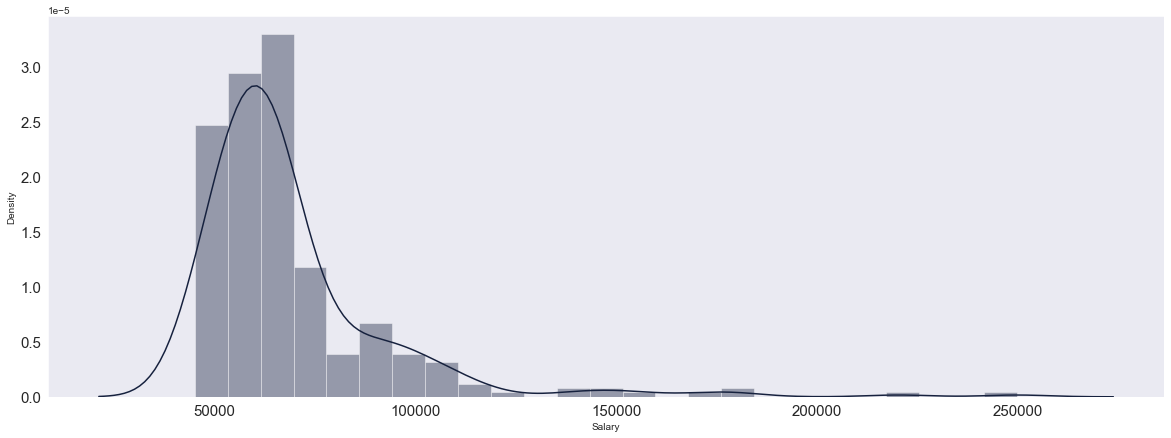

In [43]:
##c Visualize distribution of salary
plt.figure(figsize = (20, 7))
sns.set_style('dark')

sns.distplot(hrdata['Salary'], bins= 25, color='#16213E')
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

### Pie chart visualization of the Male and Female emplyees
- **Pie chart can provide a simple and intuitive way to understand the relative frequencies or proportions of different gender categories within the dataset.**

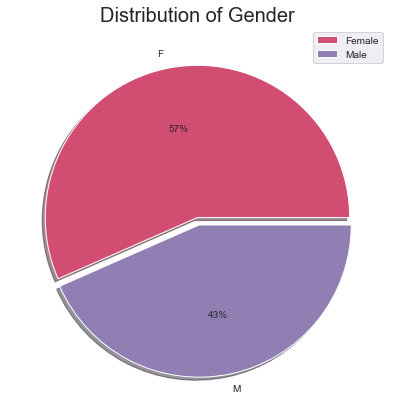

In [44]:
## Pie-chart visualize for frequencies or proportions of different gender categories
gender_label = hrdata['Sex'].value_counts().index
gender_count = hrdata['Sex'].value_counts()
explode = [0, 0.05]
color = ['#D14D72','#917FB3']

plt.figure(figsize = (7, 7))
plt.pie(gender_count, labels = gender_label, explode = explode, 
        colors= color, autopct='%1.0f%%', shadow = True)
plt.title('Distribution of Gender', fontsize= 20)

# Define the new labels
new_labels = ['Female', 'Male']
plt.legend(new_labels)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

### Bar Chart distribution of Marital Status by Gender
- **This chart shows the distribution of Marital Status by Gender. The x-axis represents the Gender categories (M or F), and the y-axis represents the count of individuals with each Marital Status. The bars are grouped by Marital Status, and the color of each bar within a group represents a different Marital Status category.**

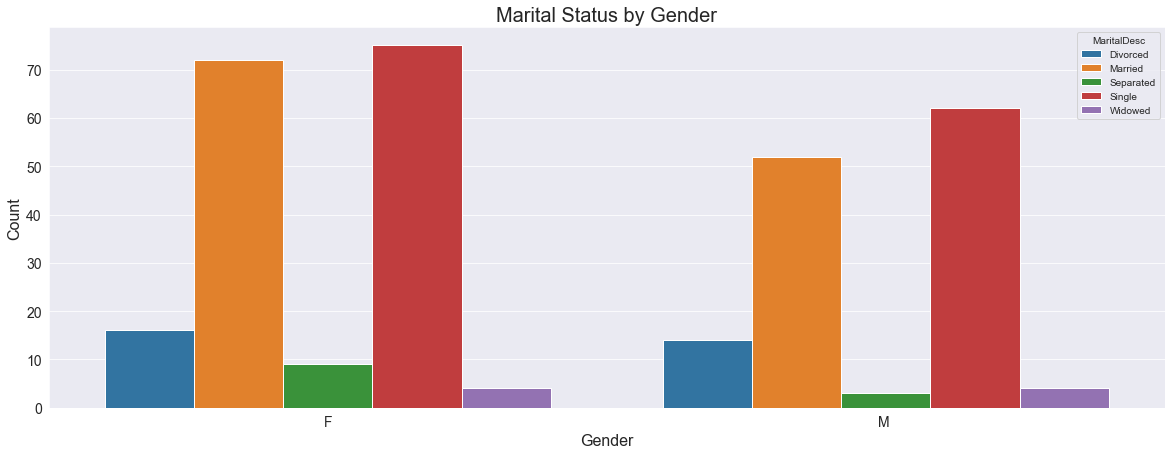

In [45]:
# Group the data by sex and marital status and count the number of occurrences
grouped = hrdata.groupby(['Sex', 'MaritalDesc']).size().reset_index(name='Count')

# Create the grouped bar chart
plt.figure(figsize = (20, 7))
sns.set_style('darkgrid')
sns.barplot(x='Sex', y='Count', hue='MaritalDesc', data=grouped)

# Set the title and labels for the chart
plt.title('Marital Status by Gender', fontsize= 20)
plt.xlabel('Gender', fontsize= 16)
plt.ylabel('Count', fontsize= 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

### Barplot to visualize relationship between average salary and top 10 position.
- **Barplots are a useful tool for visualizing relationships between two variables. In this case, we want to visualize the relationship between the average salary and the top 10 positions in a dataset.**

In [46]:
avg_salry = hrdata.groupby('Position')['Salary'].mean()
avg_salry

Position
Accountant I                     63507.666667
Administrative Assistant         52280.000000
Area Sales Manager               64932.555556
BI Developer                     95465.000000
BI Director                     110929.000000
CIO                             220450.000000
Data Analyst                     89932.571429
Data Analyst                     88527.000000
Data Architect                  150290.000000
Database Administrator          108499.600000
Director of Operations          170500.000000
Director of Sales               180000.000000
Enterprise Architect            103613.000000
IT Director                     178000.000000
IT Manager - DB                 144959.500000
IT Manager - Infra              157000.000000
IT Manager - Support            138888.000000
IT Support                       63684.375000
Network Engineer                 61605.000000
President & CEO                 250000.000000
Principal Data Architect        120000.000000
Production Manager       

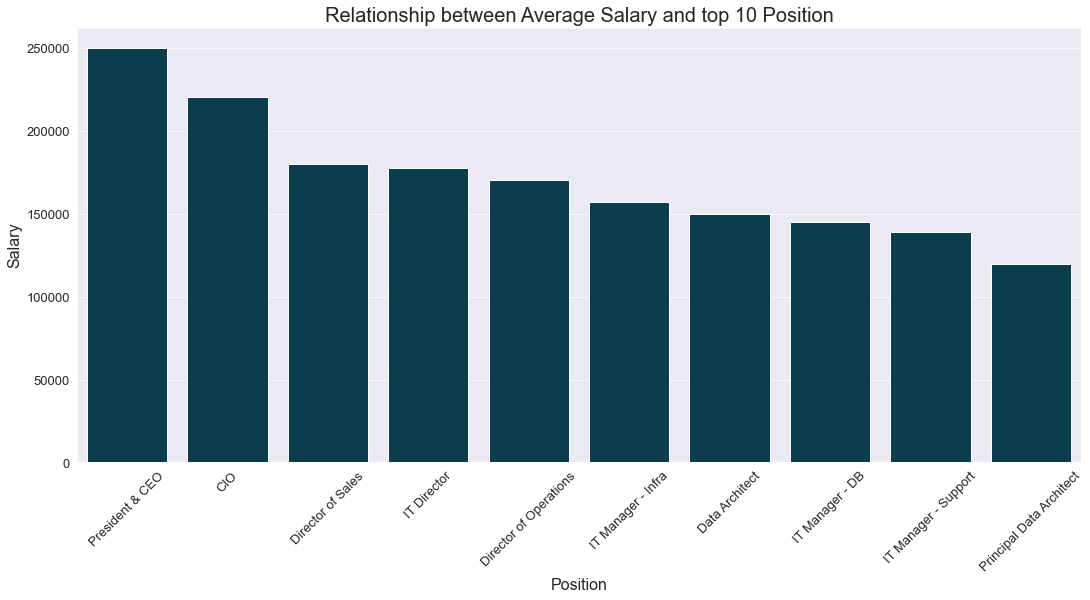

In [47]:
## Visualize relationship between average salary and top 10 position.
top_10_salary = avg_salry.sort_values(ascending=False).head(10)

plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot(x = top_10_salary.index, y = top_10_salary.values, color= '#00425A')

# Set the axis labels and title
plt.xlabel('Position', fontsize= 16)
plt.ylabel('Salary', fontsize= 16)
plt.title('Relationship between Average Salary and top 10 Position', fontsize= 20)
plt.xticks(fontsize= 13, rotation=45)
plt.yticks(fontsize= 13)
plt.show()

### Barplot to visualize relationship between average salary and Department type.
- **Visualizing the relationship between average salary and department type can be a useful way to understand how salary is distributed across different departments in an organization.**

In [48]:
avg_salry_dpt = hrdata.groupby('Department')['Salary'].mean()
avg_salry_dpt

Department
Admin Offices            71791.888889
Executive Office        250000.000000
IT/IS                    97064.640000
Production               59953.545455
Sales                    69061.258065
Software Engineering     94989.454545
Name: Salary, dtype: float64

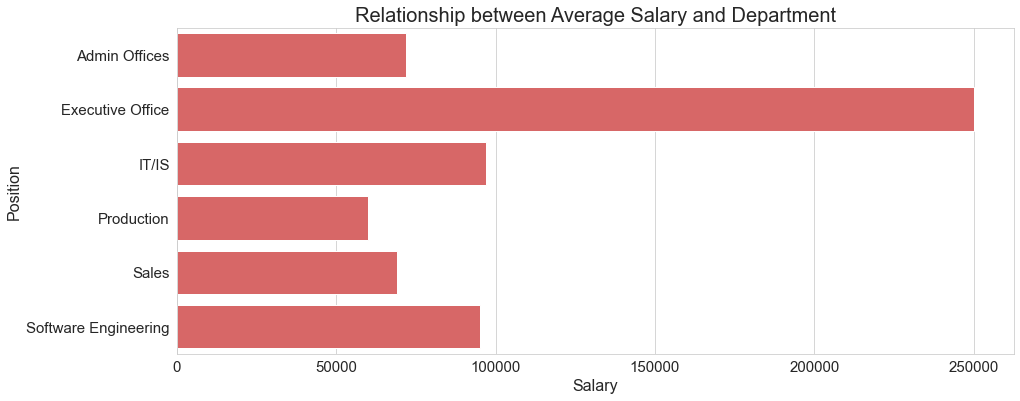

In [49]:
## Visualize relationship between average Salary and Department type.

plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.barplot(x = avg_salry_dpt.values, y = avg_salry_dpt.index, color= '#EA5455', orient= 'horizontal')

# Set the axis labels and title
plt.xlabel('Salary', fontsize= 16)
plt.ylabel('Position', fontsize= 16)
plt.title('Relationship between Average Salary and Department', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

### Heatmap to visualize the relationship between Marital Status and Employment Status
- **Using a heatmap to visualize the relationship between Marital Status and Employment Status provides an effective way to quickly identify patterns and trends in the data.**
- **The heatmap shows the count of each combination of Marital Status and Employment Status, with the color of each cell indicating the count and the annotation on each cell showing the numeric count value. This allows us to see at a glance which combinations of Marital Status and Employment Status are most common, and which are relatively rare.**

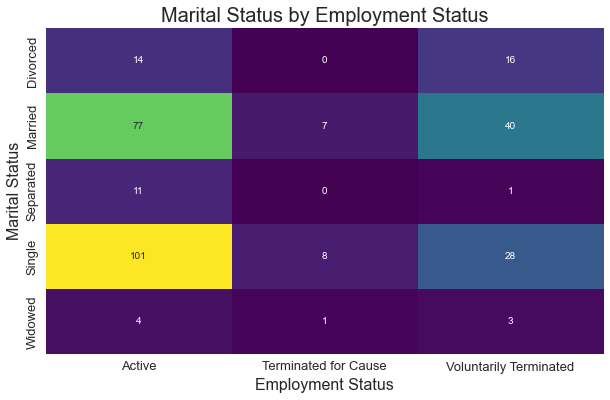

In [50]:
# Create a heatmap of the correlation between Marital Status and Employment Status
table = pd.crosstab(hrdata['MaritalDesc'], hrdata['EmploymentStatus'])

# Create a heatmap of the contingency table
plt.figure(figsize=(10,6))
sns.heatmap(table, cmap='viridis', annot=True, fmt='d', cbar=False)

# Set plot title and axis labels
plt.title('Marital Status by Employment Status', fontsize= 20)
plt.xlabel('Employment Status', fontsize= 16)
plt.ylabel('Marital Status', fontsize= 16)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.show()

### Visualising relationship between Salary and Positional ID using scatterplot.
- **Visualizing the relationship between Salary and PositionalID in a scatterplot using Matplotlib can help to identify any patterns or trends in the data. The scatterplot is a useful tool for identifying the relationship between two continuous variables, such as Salary and Positional ID.**

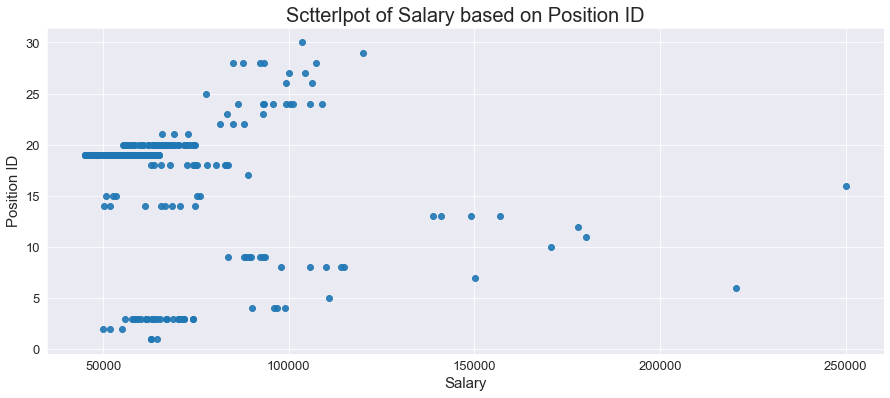

In [51]:
# Create a scatter plot of salry based on positional ID. 

plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')
plt.scatter(hrdata['Salary'], hrdata['PositionID'], alpha=0.9)

# Set the axis labels and title
plt.xlabel('Salary', fontsize= 15)
plt.ylabel('Position ID', fontsize= 15)
plt.title('Sctterlpot of Salary based on Position ID', fontsize= 20)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.show()

### Rating Distribution by Department using Boxplot
- **A box plot is an effective visualization to show the distribution of the rating data for each department type.**
- **The box plot shows the median (the line in the box), the interquartile range (the edges of the box), the range (the whiskers), and any outliers (the dots outside the whiskers).** 
- **By creating a box plot for each department type, we can easily compare the distribution of the rating data across different departments.**
- **The box plot can also help identify any potential outliers or skewness in the data. Overall, a box plot is a useful visualization for exploring the relationship between categorical department types and rating data.**

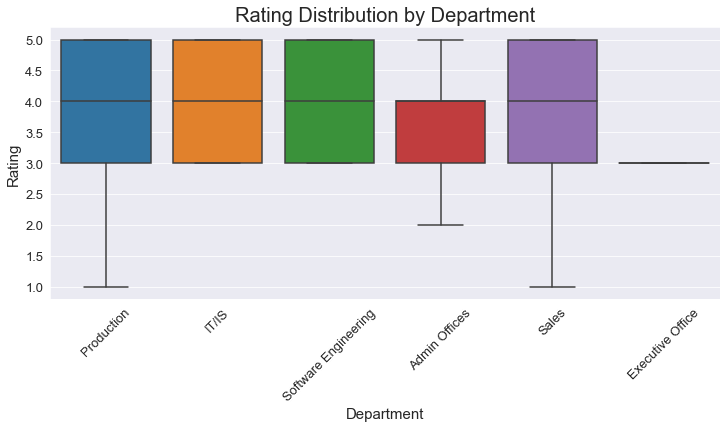

In [52]:
# Create box plot
plt.figure(figsize=(12, 5))
sns.boxplot(x="Department", y="EmpSatisfaction", data=hrdata)

# Set title and labels
plt.title("Rating Distribution by Department", fontsize= 20)
plt.xlabel("Department", fontsize= 15)
plt.ylabel("Rating", fontsize= 15)
plt.xticks(fontsize= 13, rotation=45)
plt.yticks(fontsize= 13)
plt.show()

### Using countplot to visualize the employee count by state
- **The `countplot()` function in the seaborn library is a useful visualization tool to count the number of occurrences of each category in a categorical variable. In this case, the `countplot()` function can be used to count the number of employees belonging to each state in a given dataset.**

- **By using the countplot to visualize the employee count by state, one can easily determine which states have the highest and lowest number of employees. This information can be particularly useful in human resources management and workforce planning, as it can provide insights into which states may require more or less resources, or where recruitment efforts may need to be focused.**

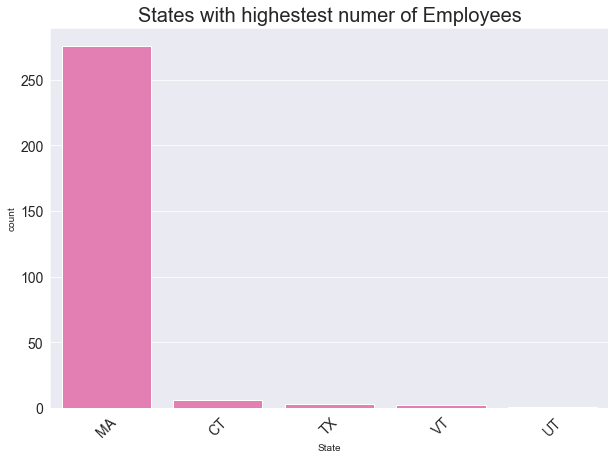

In [53]:
# Creating count plot to visualize the 5 states with highest employees.
top_5_states = hrdata['State'].value_counts().head(5).index.tolist()

# filter the DataFrame to keep only the top 5 states
hr_top_5_states = hrdata[hrdata['State'].isin(top_5_states)]

# create a countplot of the top 10 states
plt.figure(figsize=(10, 7))
sns.countplot(x='State', data=hr_top_5_states, order=top_5_states, color = '#F56EB3')
plt.title('States with highestest numer of Employees', fontsize= 20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xticks(rotation=45)
plt.show()

## End of Assignment
## _Thank You_